
 <center><img src='https://media.tenor.com/BLYJbJREVvIAAAAC/fit-personalpenguintrainer.gif' 
     height=200px width=300px /></center>

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:130%; text-align:left">

 <h2 align="left"><font color=#E1B12D>Goal</font></h2>


The goal of this competition is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.<br>
     

<h2 align="left"><font color=#E1B12D>About the Dataset</font></h2>
    
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data  was generated from a deep learning model trained on the [Obesity risk dataset](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster).<br>
</div>
    


<a id="toc"></a>

- [1.1 Import Libraries](#1.1)
- [1.2 Import Data](#1.2)
- [1.3 Quick overview](#1.3)
- [1.4 Summary of the data](#1.4)
- [2. Exploratory Data Analysis ](#2)
- [3. Pre-Processing](#3)
- [4. Model building](#4)
- [5. Prediction on Test data](#5)


<a id="1.1"></a>
## <b>1.1 <span style='color:#E1B12D'>Import Libraries</span></b> 

In [1]:
%%capture
!pip install scikit-learn xgboost lightgbm catboost

In [2]:
%%capture
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [3]:
#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format

<a id="toc"></a>

<a href="#toc" style="background-color: #E1B12D; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="1.2"></a>
## <b>1.2 <span style='color:#E1B12D'>Import Data</span></b> 

In [4]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [5]:
#Let's check the Shape of data
print(f'The Train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns')
print(f'The Test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns')

The Train dataset has 20758 rows and 18 columns
The Test dataset has 13840 rows and 17 columns


In [6]:
df_train.describe().to_csv('output.csv', index=False)

<a id="toc"></a>

<a href="#toc" style="background-color: #E1B12D; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="1.3"></a>
## <b>1.3 <span style='color:#E1B12D'>Quick overview</span></b> 

In [7]:
#Let's check the samples of data
display('Train:',df_train.head())
display('Test:',df_test.head())

'Train:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.44,1.70,81.67,yes,yes,2.00,2.98,Sometimes,no,2.76,no,0.00,0.98,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.00,1.56,57.00,yes,yes,2.00,3.00,Frequently,no,2.00,no,1.00,1.00,no,Automobile,Normal_Weight
2,2,Female,18.00,1.71,50.17,yes,yes,1.88,1.41,Sometimes,no,1.91,no,0.87,1.67,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.95,1.71,131.27,yes,yes,3.00,3.00,Sometimes,no,1.67,no,1.47,0.78,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.64,1.91,93.80,yes,yes,2.68,1.97,Sometimes,no,1.98,no,1.97,0.93,Sometimes,Public_Transportation,Overweight_Level_II


'Test:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.90,1.85,120.64,yes,yes,2.94,3.00,Sometimes,no,2.83,no,0.86,0.00,Sometimes,Public_Transportation
1,20759,Female,21.00,1.60,66.00,yes,yes,2.00,1.00,Sometimes,no,3.00,no,1.00,0.00,Sometimes,Public_Transportation
2,20760,Female,26.00,1.64,111.60,yes,yes,3.00,3.00,Sometimes,no,2.62,no,0.00,0.25,Sometimes,Public_Transportation
3,20761,Male,20.98,1.55,103.67,yes,yes,2.00,2.98,Sometimes,no,2.79,no,0.09,0.00,Sometimes,Public_Transportation
4,20762,Female,26.00,1.63,104.84,yes,yes,3.00,3.00,Sometimes,no,2.65,no,0.00,0.74,Sometimes,Public_Transportation


<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:130%; text-align:left">
The attributes related with eating habits are:<br>

In [8]:
from tabulate import tabulate
data = [
    ["FAVC", "Frequent consumption of high caloric food"],
    ["FCVC", "Frequency of consumption of vegetables"],
    ["NCP", "Number of main meals"],
    ["CAEC", "Consumption of food between meals"],
    ["CH20", "Consumption of water daily"],
    ["CALC", "Consumption of alcohol"],
    ["SCC", "Calories consumption monitoring"],
    ["FAF", "Physical activity frequency"],
    ["TUE", "Time using technology devices"],
    ["MTRANS", "Transportation used"]
]
headers = ["Abbreviation", "Full Form"]

table = tabulate(data, headers, tablefmt="pipe")
print(table)

| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |


<a id="toc"></a>

<a href="#toc" style="background-color: #E1B12D; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="1.4"></a>
## <b>1.4 <span style='color:#E1B12D'>Summary of the data</span></b> 

In [9]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    summ['top value'] = desc['top'].values
    summ['Freq'] = desc['freq'].values

    return summ

In [10]:
summary(df_train.drop(columns=["id"])).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Gender,object,0,0,2,nan,nan,nan,nan,Female,10422
Age,float64,0,0,1703,14.000000,61.000000,23.841804,5.688072,nan,nan
Height,float64,0,0,1833,1.450000,1.975663,1.700245,0.087312,nan,nan
Weight,float64,0,0,1979,39.000000,165.057269,87.887768,26.379443,nan,nan
family_history_with_overweight,object,0,0,2,nan,nan,nan,nan,yes,17014
FAVC,object,0,0,2,nan,nan,nan,nan,yes,18982
FCVC,float64,0,0,934,1.000000,3.000000,2.445908,0.533218,nan,nan
NCP,float64,0,0,689,1.000000,4.000000,2.761332,0.705375,nan,nan
CAEC,object,0,0,4,nan,nan,nan,nan,Sometimes,17529
SMOKE,object,0,0,2,nan,nan,nan,nan,no,20513


<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:130%; text-align:left">

<b>About Data:</b><br>
• The train dataset contains 20758 rows and 18 columns <br>
• There are no missing or duplicate values in any of the columns.<br>
• Target Variable - Obesity Classification <br>
    </div>

<a id="toc"></a>

<a href="#toc" style="background-color: #E1B12D; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="2"></a>
## <b>2 <span style='color:#E1B12D'> Exploratory Data Analysis</span></b> 

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
<b>Let's visualize each of the variables:</b><br>
Target Variable:<br>

In [11]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = df_train[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677']
    
    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    ax[0].add_artist(centre_circle)
    
    # Count Plot
    sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9,color='black')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


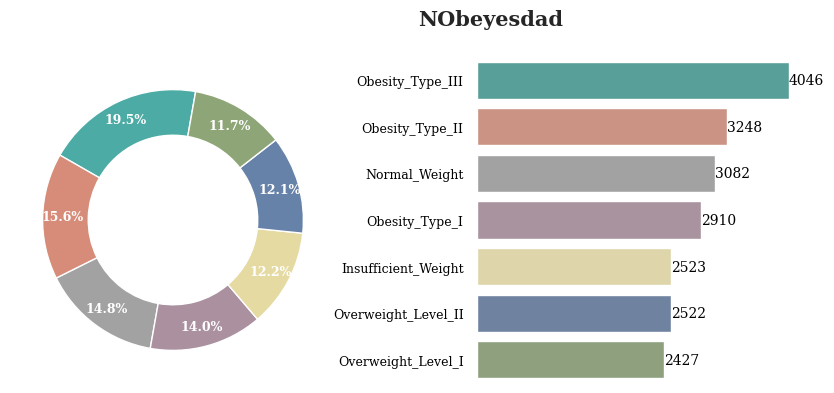

In [12]:
showplot("NObeyesdad")

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
✩ We have highest number of people with <b>Ovesity_Type III</b> having share of <b>19.5%</b>

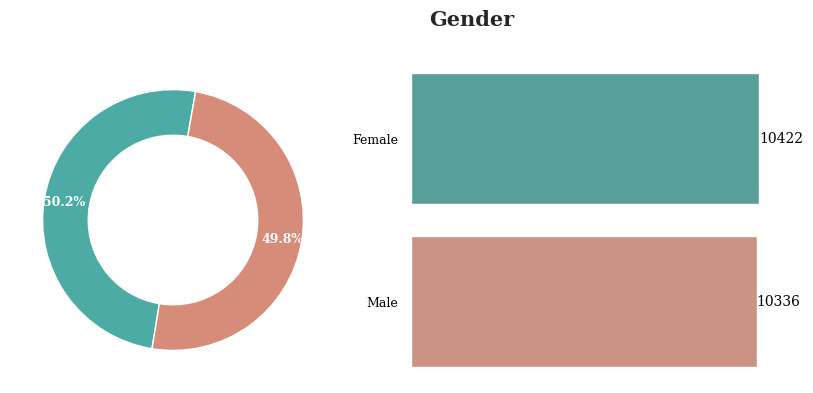

In [13]:
showplot('Gender')

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
✩ <b>Gender</b> distribution is fairly equal in the dataset

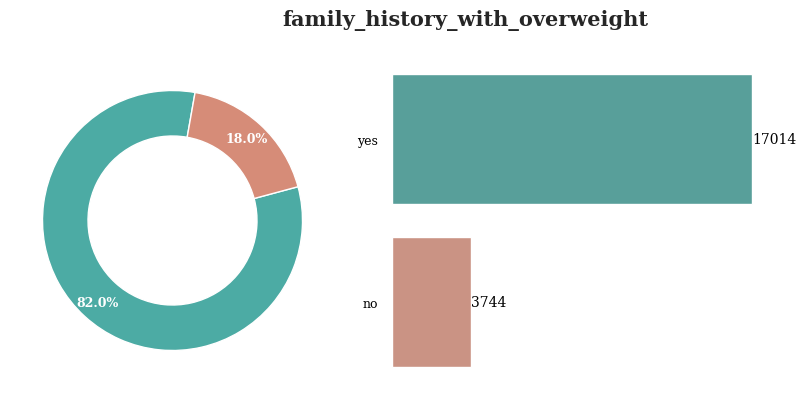

In [14]:
showplot("family_history_with_overweight")

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
✩ <b>82.0%</b> people have a family history with Overweight

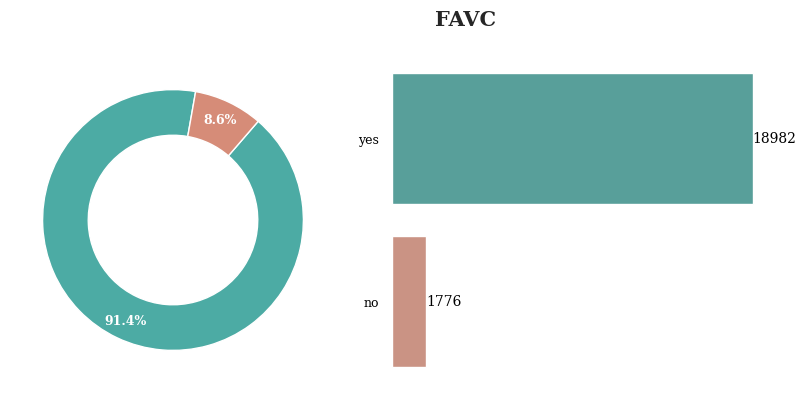

In [15]:
showplot("FAVC")

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
✩ <b>91.4%</b> people <b>Frequently consume high caloric food</b>

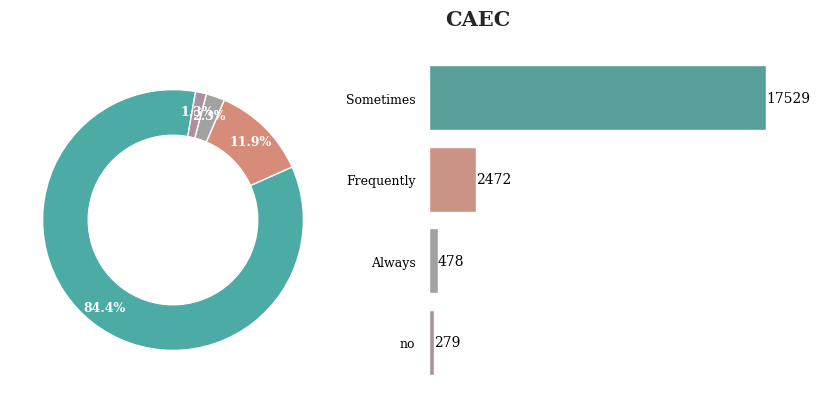

In [16]:
showplot("CAEC")

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
✩ <b>84.4% sometimes </b>consumes food between meals while ~1.5% says No meals in between

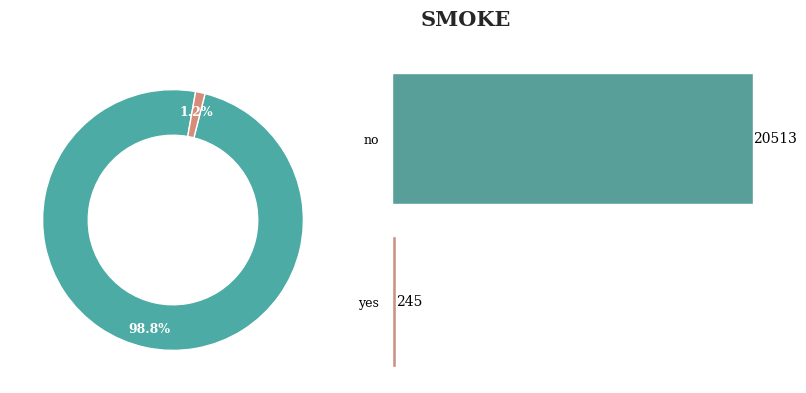

In [17]:
showplot("SMOKE")

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
✩ <b>98.8% </b> are non-Smokers. Doesn't sound correct, but let's trust the data. 🚭

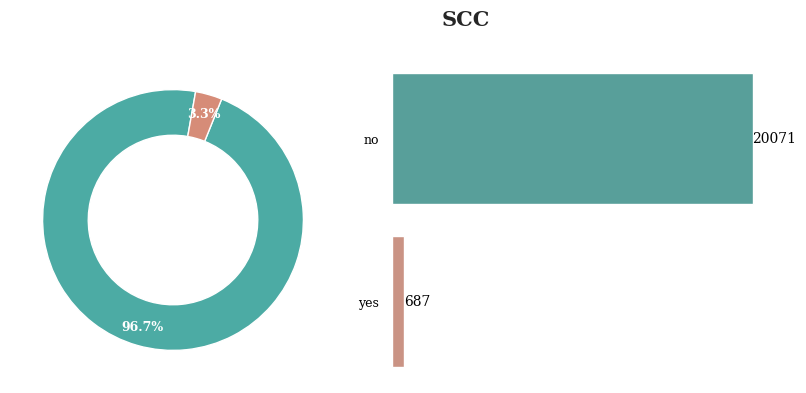

In [18]:
showplot("SCC")

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
✩ <b>96.7% don't bother</b> monitoring calorie consumption.<br>
    Counting calories? Only folks who don't truly appreciate the art of savoring food would do that, right? 🧐

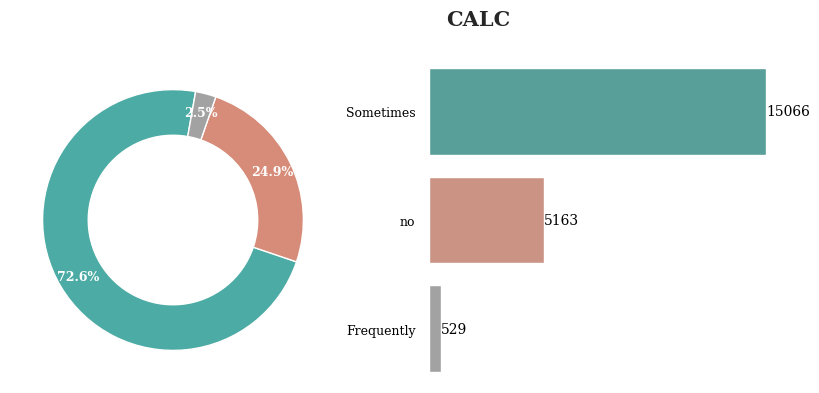

In [19]:
showplot("CALC")

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
✩ <b>72.6%</b> consumes alcohol sometimes while 2.5% does Frequent.<br>
Interesting to note that in Test dataset, we have "Always" as well.

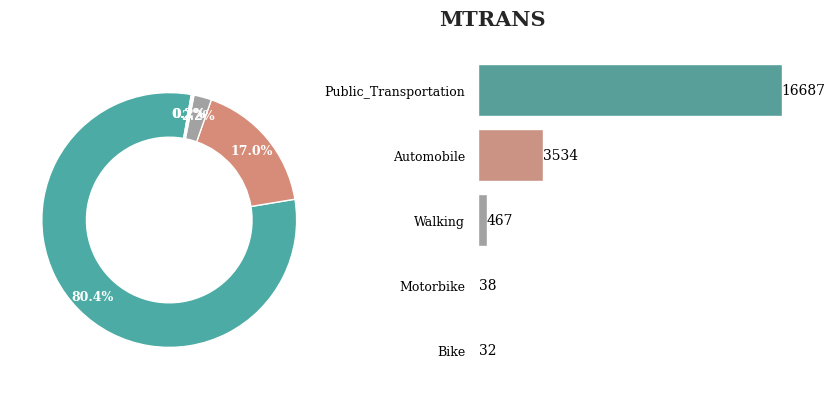

In [20]:
showplot("MTRANS")

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
✩ <b>97.6%</b> use some form of vehicles while only <b>~2.4% prefers walking/using bike</b> That's concerning!

In [21]:
# Checking for distributions
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], axis=1)
def dist(train_dataset, original_dataset, columns_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(24, 10))
    plt.suptitle('Distribution for numerical features: Train vs Original Dataset', fontsize=16, fontweight='bold')
    axs = axs.flatten()
    
    for i, col in enumerate(columns_list):
        sns.kdeplot(train_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#05b0a3', label='Train')
        sns.kdeplot(original_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#d68c78', label='Original')
        axs[i].set_title(f'{col}, Train skewness: {train_dataset[col].skew():.2f}\n Original skewness: {original_dataset[col].skew():.2f}')
        axs[i].legend()
        
    plt.tight_layout()

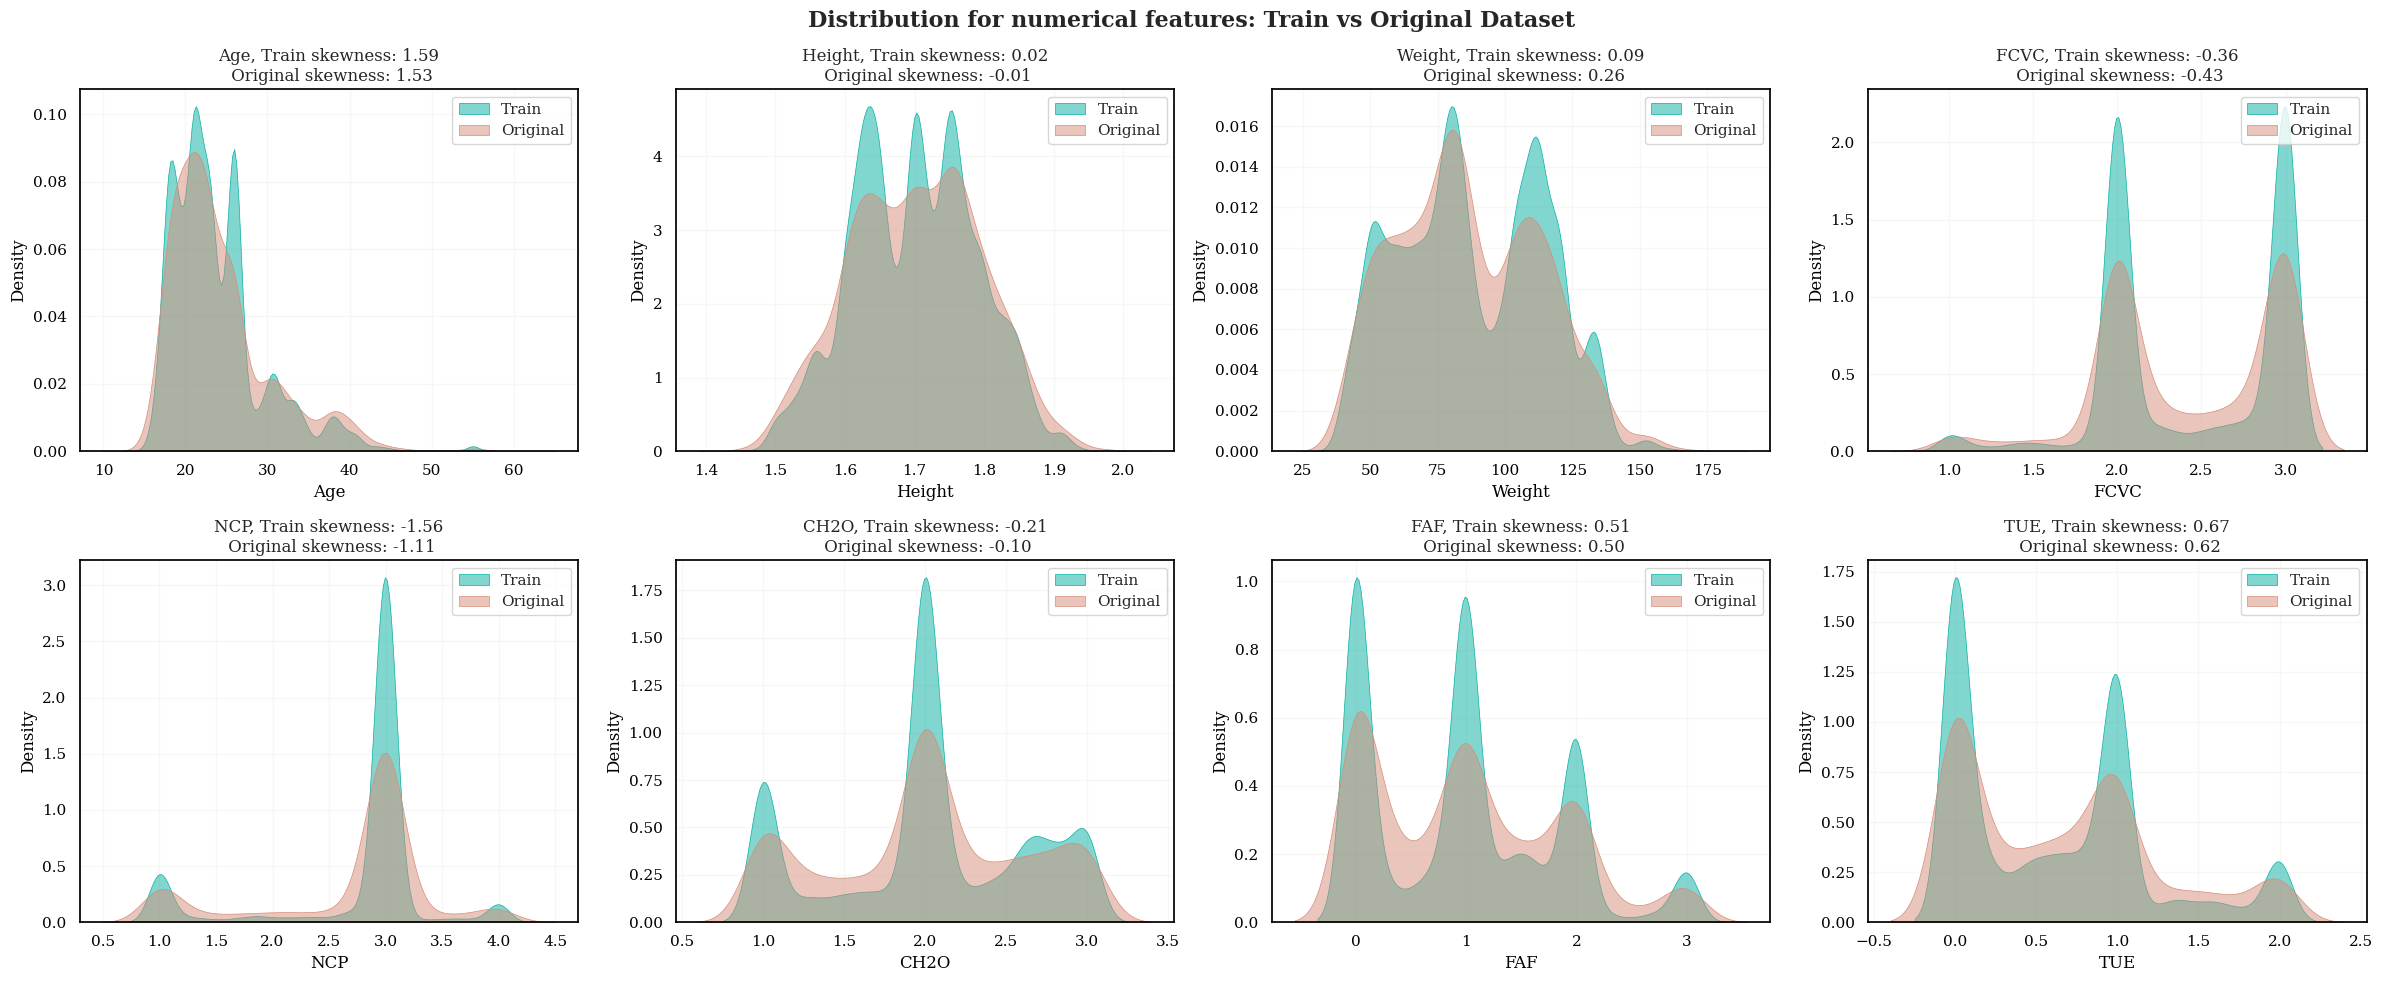

In [22]:
dist(train_dataset=df_train, original_dataset=original, columns_list=numeric_columns.columns, rows=2, cols=4)

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
⦿  Age, height and Weight are normally distributed with some skewness

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:170%; text-align:left">
Visualizing Features with Target Variable:<br>


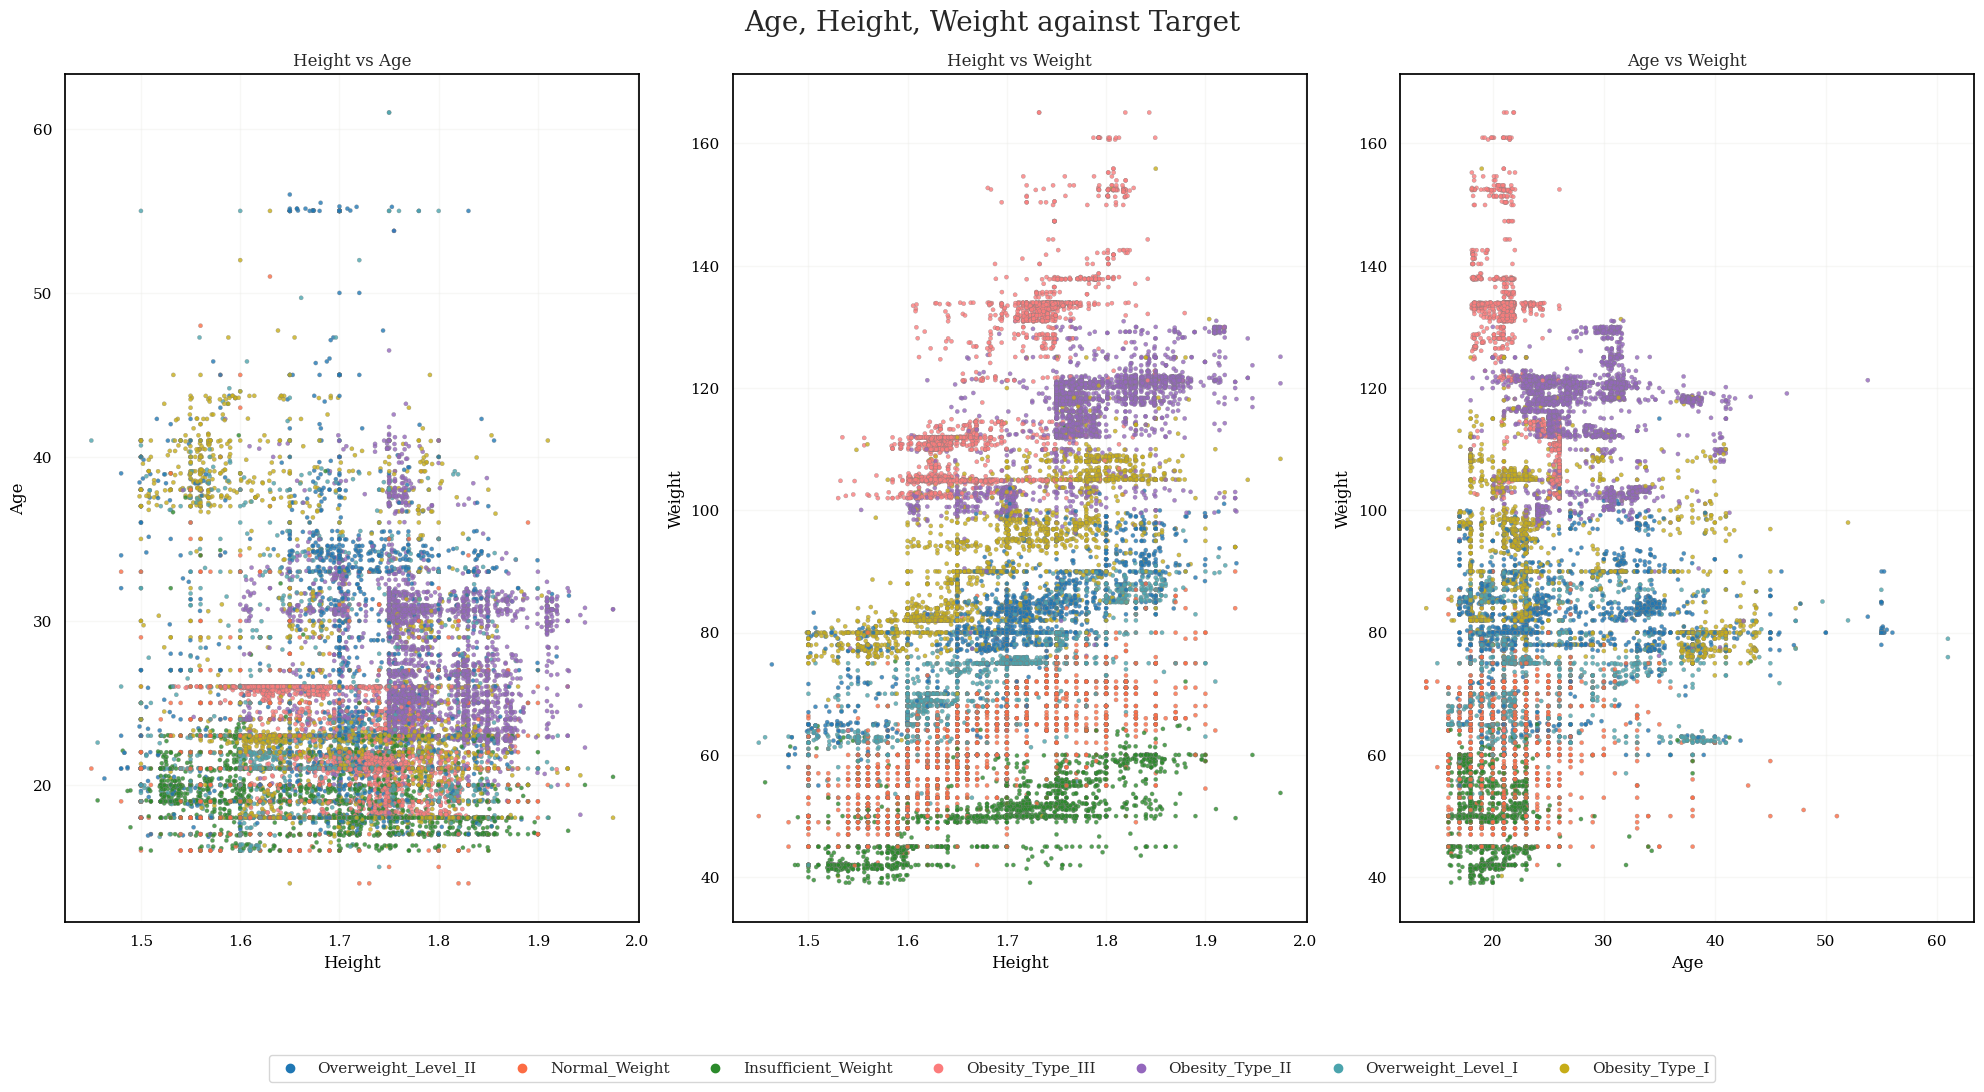

In [23]:
colors = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108']
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
ax1 = sns.scatterplot(x=df_train['Height'], y=df_train['Age'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[0])
axes[0].set_title('Height vs Age')
ax2 = sns.scatterplot(x=df_train['Height'], y=df_train['Weight'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[1])
axes[1].set_title('Height vs Weight')
ax3 = sns.scatterplot(x=df_train['Age'], y=df_train['Weight'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[2])
axes[2].set_title('Age vs Weight')
for ax in axes.flatten():
    ax.get_legend().remove()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(df_train['NObeyesdad'].unique()),
           title='')
fig.suptitle('Age, Height, Weight against Target', fontsize=20)
fig.subplots_adjust(bottom=0.5, top=0.9, hspace=0.5)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
⦿  This doesn't provide much information, let's create BMI as a feature & check it individually against Target



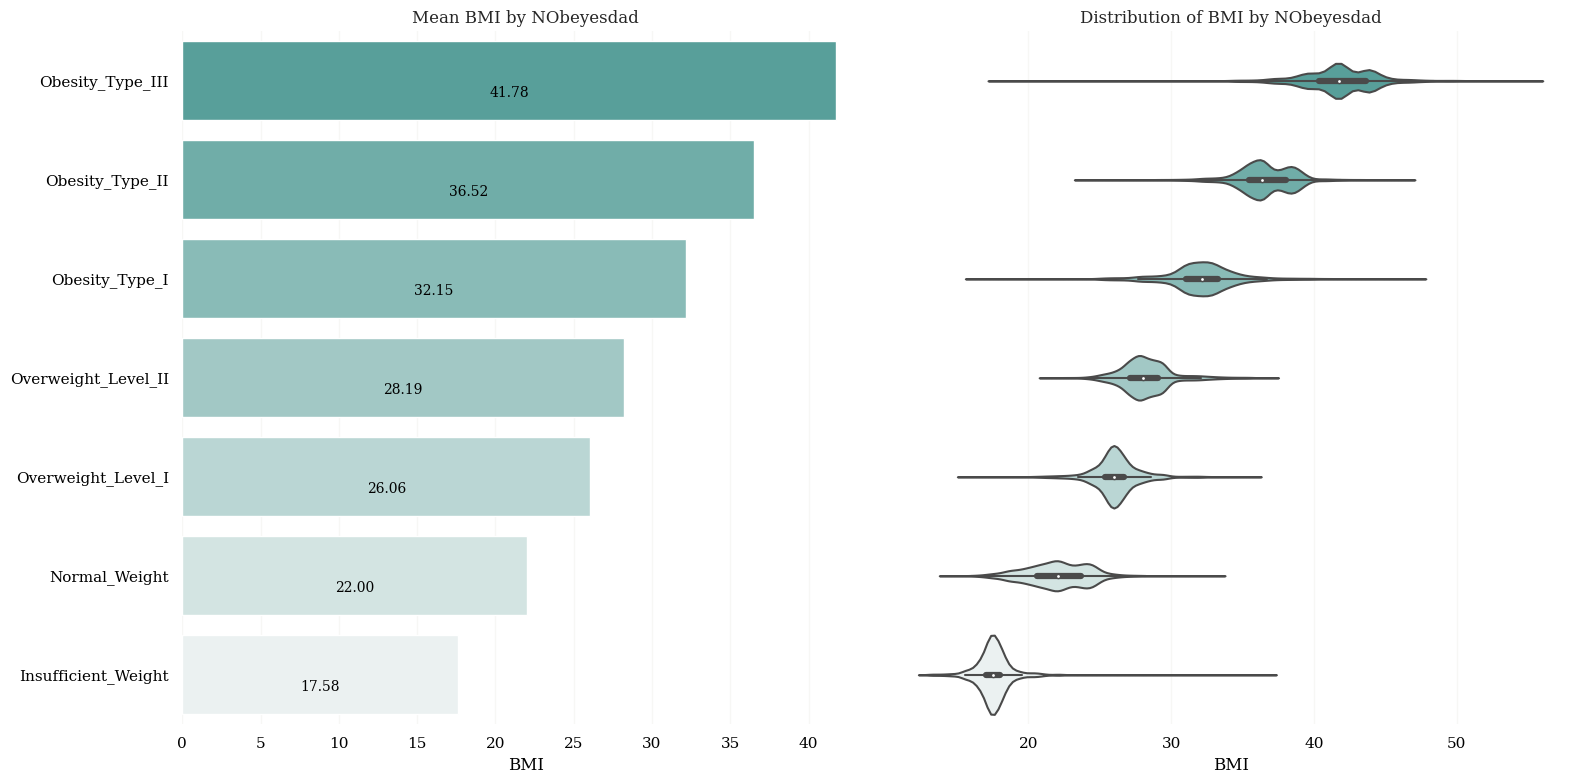

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
df_train['BMI']=  df_train['Weight'] / df_train['Height']**2
ax1 = axes[0]
df_sort = df_train.groupby('NObeyesdad')['BMI'].mean().sort_values(ascending=False).index
sns.barplot(x='BMI', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean BMI by NObeyesdad')
ax1.set_xlabel('BMI')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(x='BMI', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of BMI by NObeyesdad')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
⦿ It is evident from the above plot that Obesity Type III has the highest Mean BMI of 41.78 against normal weight having an mean BMI of 22.0  <br>
⦿ There is inconsistency in the categories wherein the BMI levels are not as these should ideally be. Let's further investigate it.

In [25]:
df_train.groupby('NObeyesdad')['BMI'].describe().reset_index().style.background_gradient()

,NObeyesdad,count,mean,std,min,25%,50%,75%,max
0,Insufficient_Weight,2523.000000,17.583619,1.388408,12.868541,17.025801,17.506390,18.025957,36.778115
1,Normal_Weight,3082.000000,22.000999,2.194097,14.631670,20.568937,22.038567,23.661439,32.882414
2,Obesity_Type_I,2910.000000,32.154649,2.513458,16.597443,31.020408,32.121386,33.298647,46.805188
3,Obesity_Type_II,3248.000000,36.521958,2.112538,24.048460,35.436970,36.378753,38.023475,46.222483
4,Obesity_Type_III,4046.000000,41.781745,2.670789,18.178670,40.371119,41.750620,43.615233,54.997991
5,Overweight_Level_I,2427.000000,26.059270,1.768697,15.761880,25.390625,25.963757,26.672763,35.555556
6,Overweight_Level_II,2522.000000,28.192491,1.835666,21.513859,27.080170,28.020083,29.086346,36.741456


<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
⦿ The BMI for each categories are inconsistent, e.g. Obesity_Type_II ranges from 24.05 to 46.22 or Obesity_Type_III ranges from 18.18 to 54.99, which is not ideal case  <br>

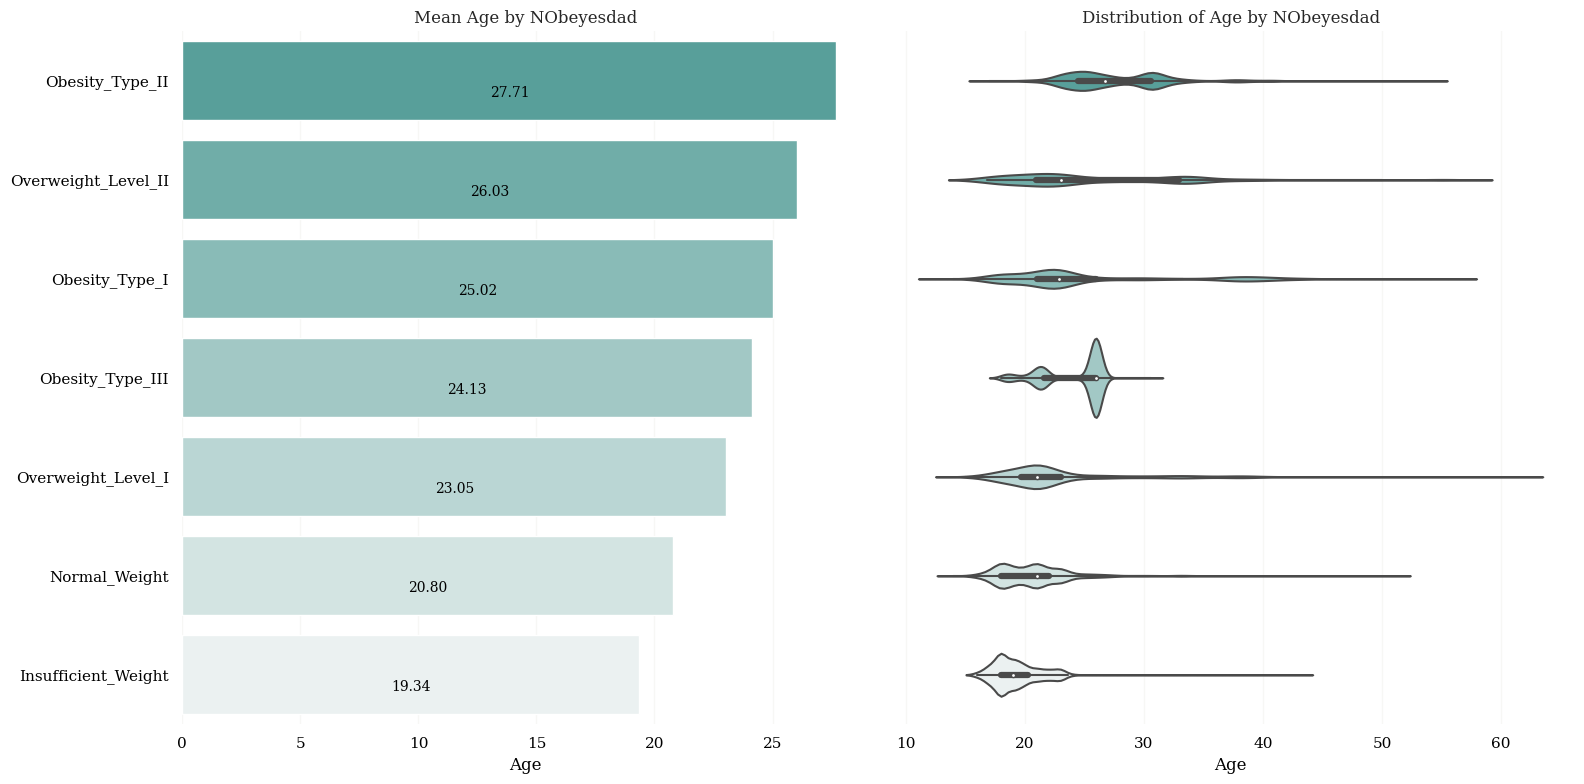

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax1 = axes[0]
df_sort = df_train.groupby('NObeyesdad')['Age'].mean().sort_values(ascending=False).index
sns.barplot(x='Age', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean Age by NObeyesdad')
ax1.set_xlabel('Age')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(x='Age', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of Age by NObeyesdad')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
⦿ Normal Weight or Insufficient weight people seems to be yonger on an average than the rest  <br>

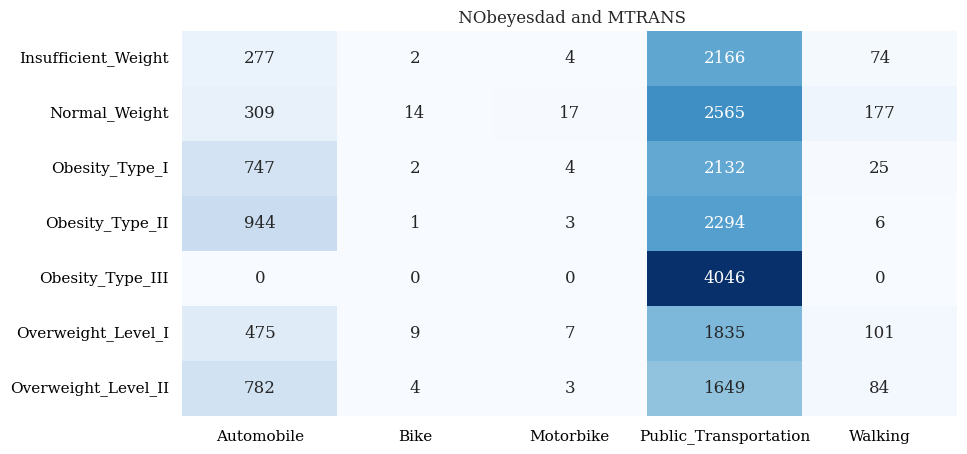

In [27]:
cross_tab = pd.crosstab(df_train['NObeyesdad'], df_train['MTRANS'])
plt.figure(figsize=(10, 5))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(' NObeyesdad and MTRANS')
plt.xlabel('')
plt.ylabel('')
plt.show()

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
⦿ Obesity_Type II or Type III people do not or rarely walk or use bike which shows lack of physical activity <br>

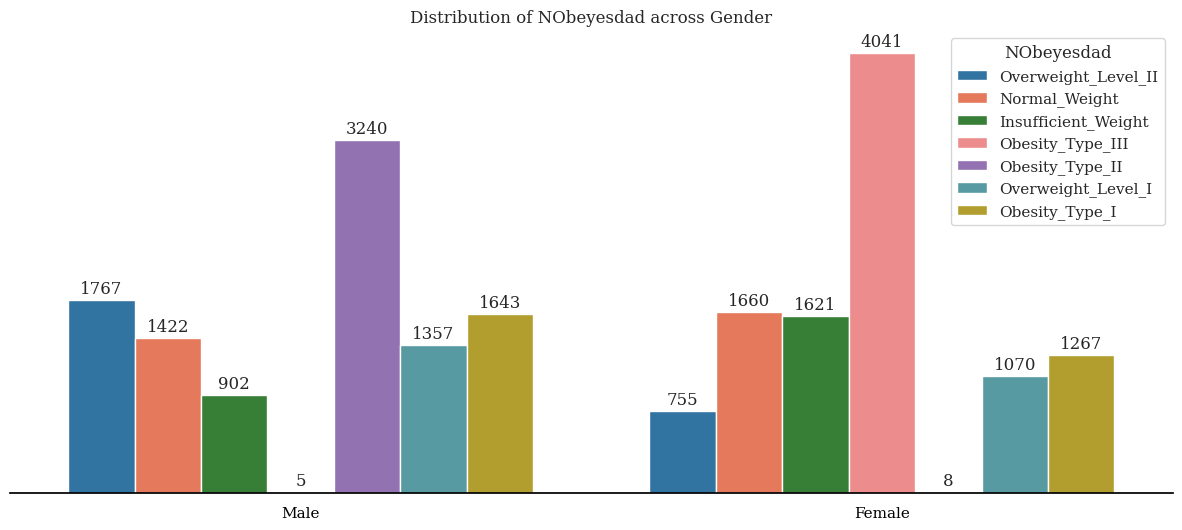

In [28]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Gender', hue='NObeyesdad', data=df_train, palette=colors, dodge=True)
plt.title('Distribution of NObeyesdad across Gender')
sns.despine(left=True, bottom=False)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.show()

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
⦿Obesity Type II is most common among Males, while Obesity Type III is most common among Females.  <br>

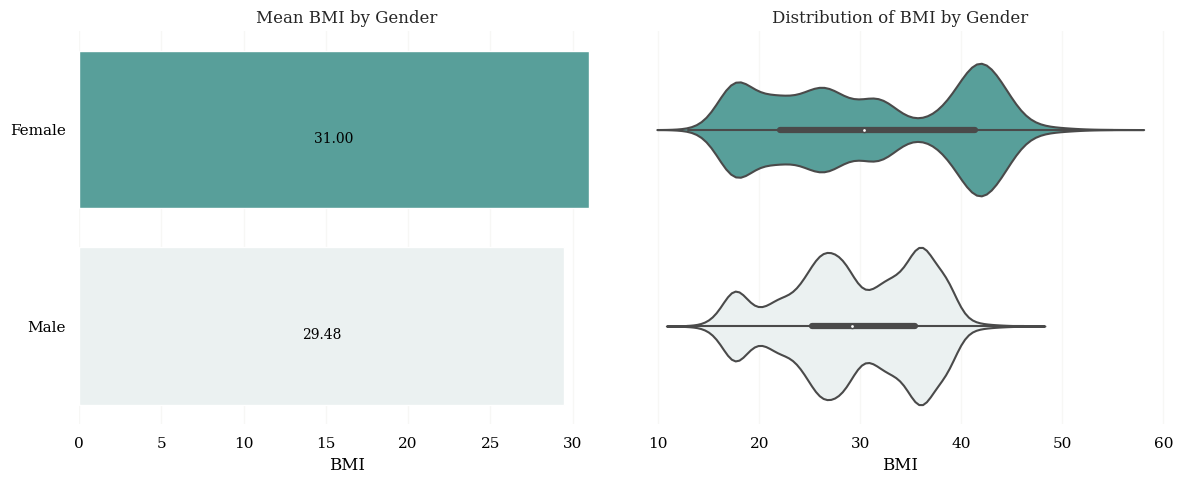

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_train['BMI']=  df_train['Weight'] / df_train['Height']**2
ax1 = axes[0]
df_sort = df_train.groupby('Gender')['BMI'].mean().sort_values(ascending=False).index
sns.barplot(x='BMI', y='Gender', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 50), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean BMI by Gender')
ax1.set_xlabel('BMI')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)
# Violin Plot
ax2 = axes[1]
sns.violinplot(x='BMI', y='Gender', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of BMI by Gender')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
⦿ BMI is higher amongs Female as compared to male which was visible in previous plot of Obeity vs Gender Plot  <br>

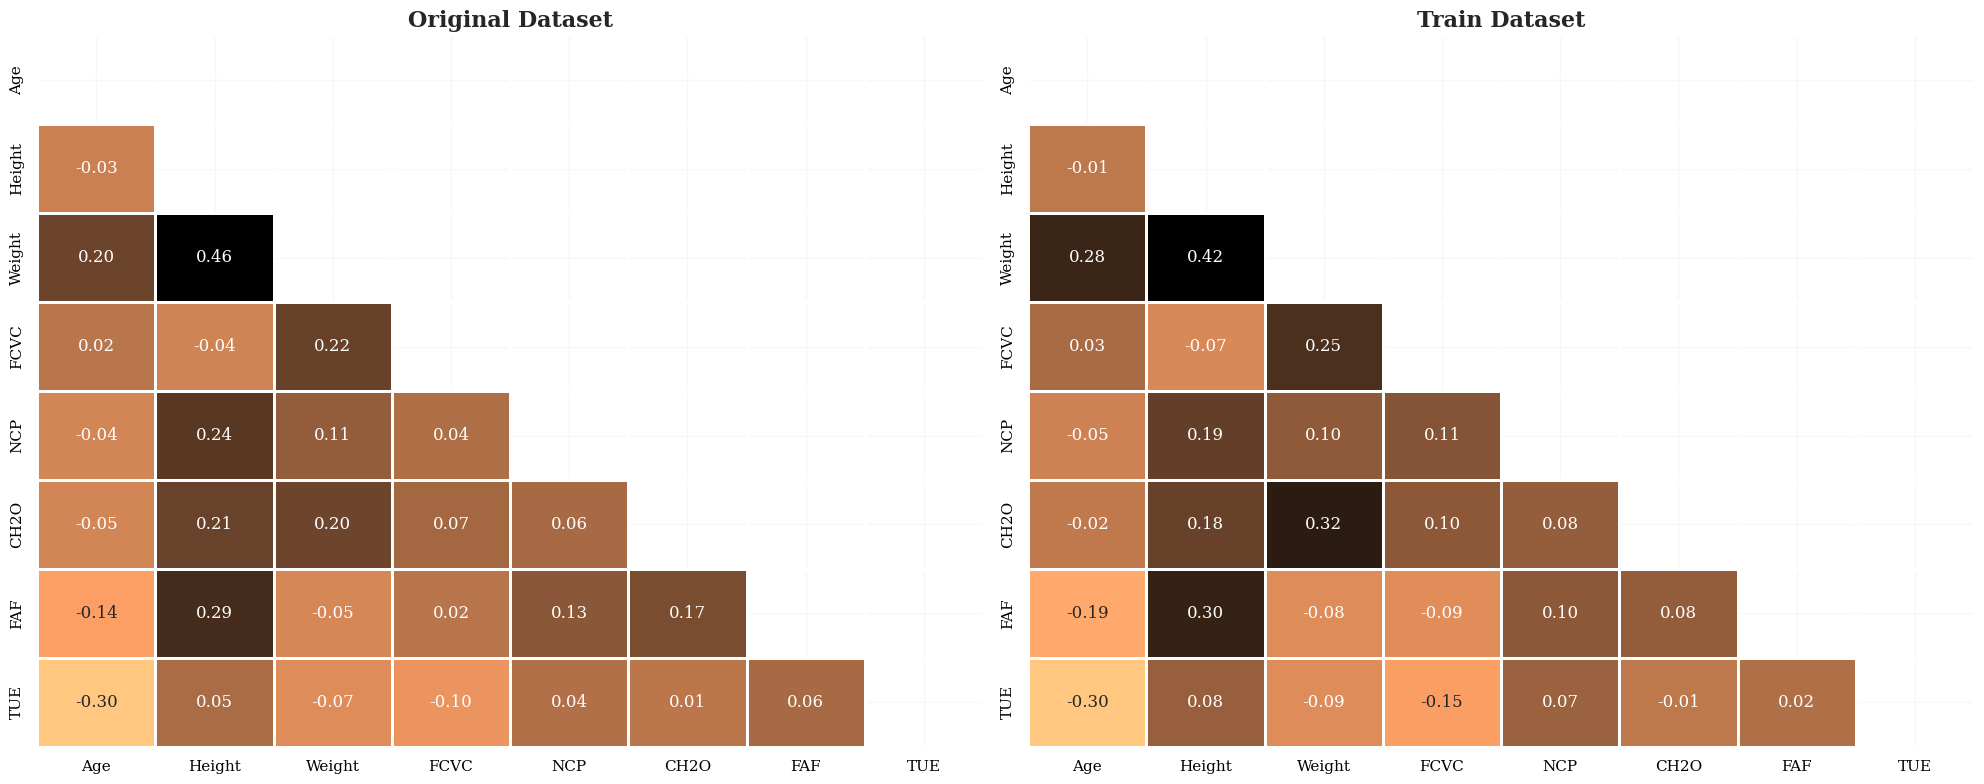

In [30]:
#Correlation heatmap
numeric_columns_original = original.select_dtypes(include=np.number)
numeric_columns_train = df_train.select_dtypes(include=np.number).drop(['id','BMI'], axis=1)
# original
corr_original = numeric_columns_original.corr(method='pearson')
mask_original = np.triu(np.ones_like(corr_original))
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(corr_original, annot=True, fmt='.2f', mask=mask_original, cmap='copper_r', cbar=None, linewidth=2, ax=axes[0])
axes[0].set_title('Original Dataset', fontsize=16, fontweight='bold')

# Train
corr_train = numeric_columns_train.corr(method='pearson')
mask_train = np.triu(np.ones_like(corr_train))
sns.heatmap(corr_train, annot=True, fmt='.2f', mask=mask_train, cmap='copper_r', cbar=None, linewidth=2, ax=axes[1])
axes[1].set_title('Train Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
⦿ Weight and Height has the highest positive correlation <br>
⦿ Correlation is almost similar in both original & Train dataset <br>

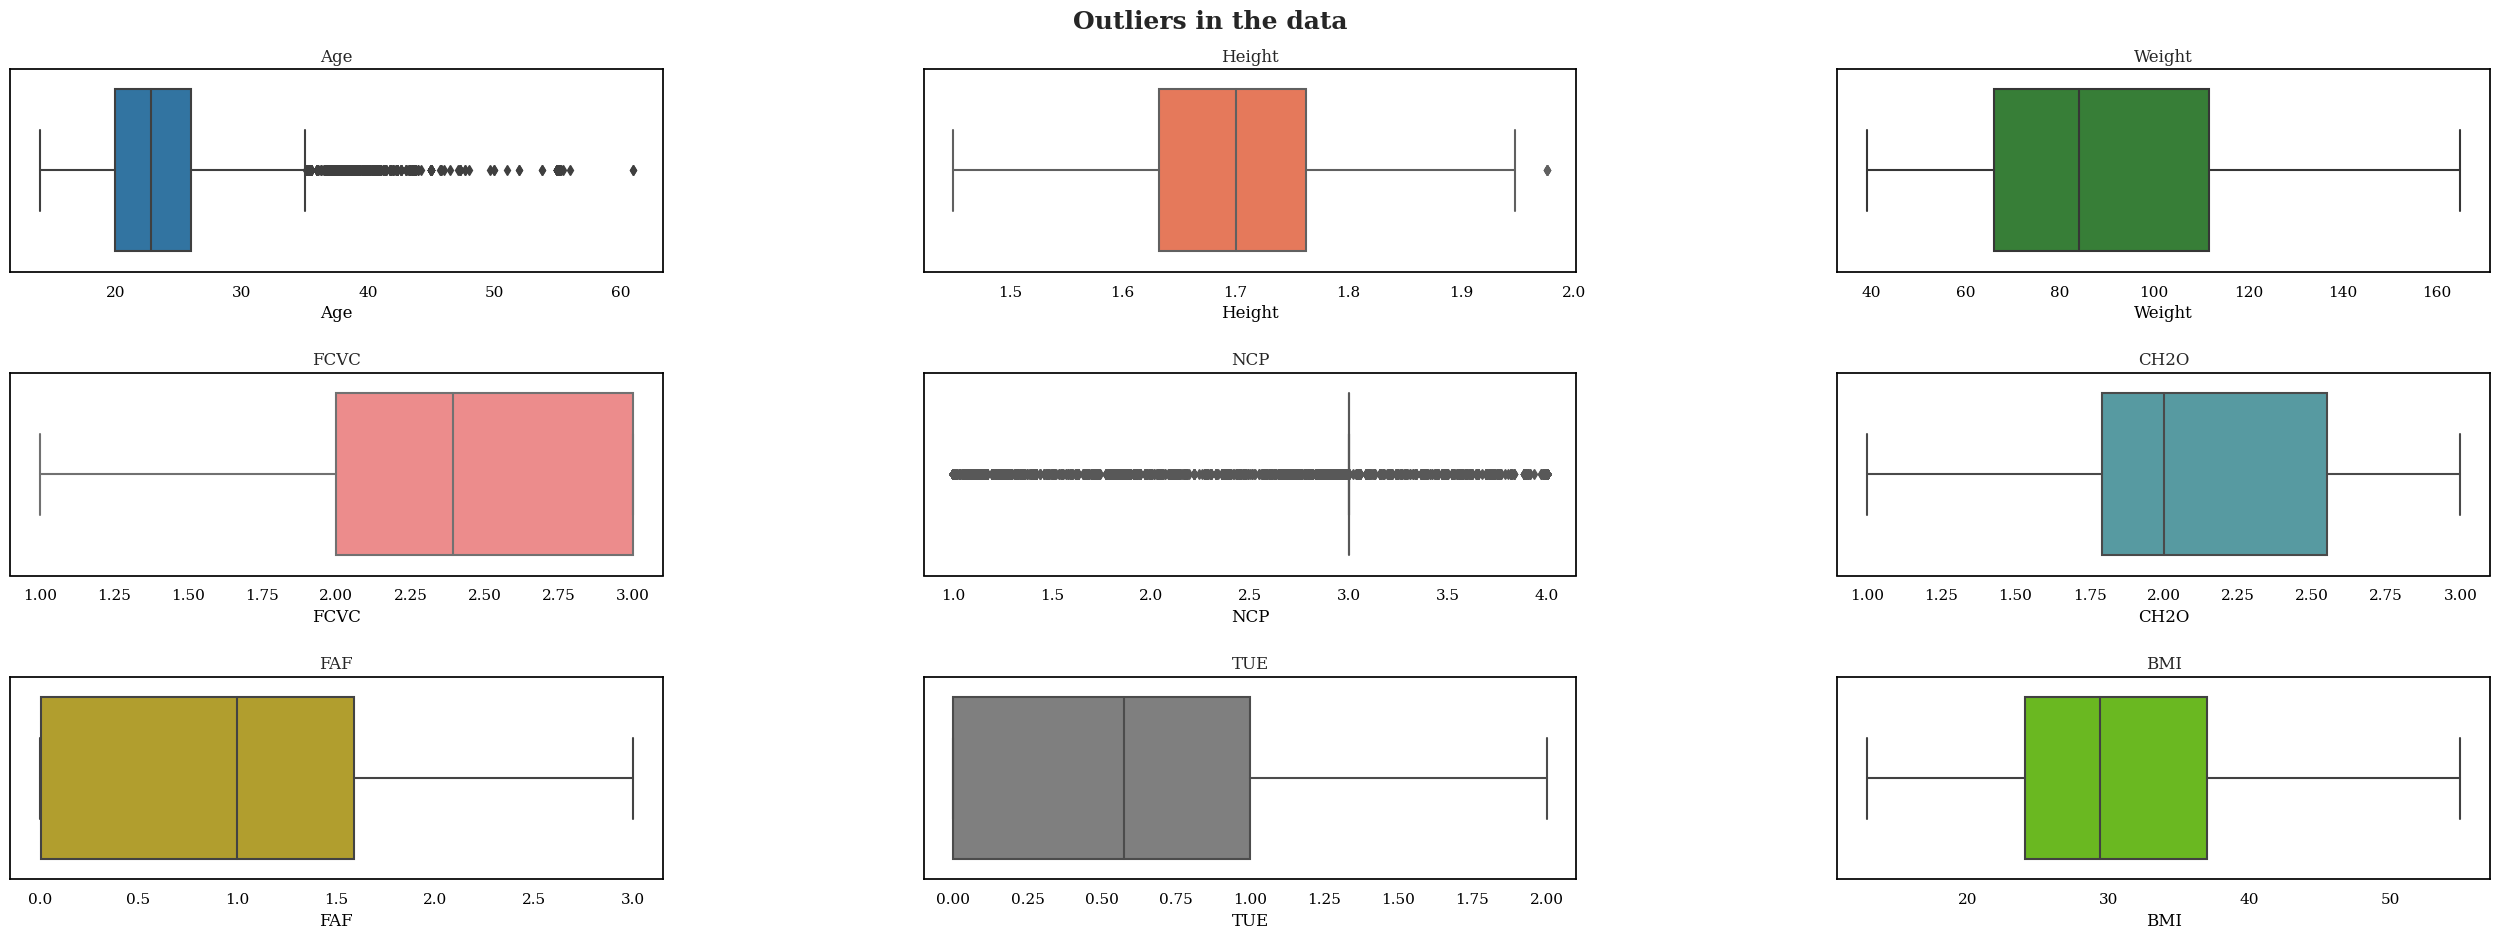

In [31]:
#Check for presence of outliers in each feature
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], axis=1)
fig = plt.figure(figsize=[32,10])
plt.suptitle('Outliers in the data', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric_columns):
    ax = fig.add_subplot(3,3, i+1);
    ax = sns.boxplot(data = df_train, x=col ,  color= colors[i]);
    ax.set_title(f'{col}')
    ax.set_xlabel(f'{col}')
    ax.grid(False)
plt.show()

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
⦿  Outliers present in Age<br>
⦿  Rest features do not have presence of outliers<br>



<a id="toc"></a>

<a href="#toc" style="background-color: #E1B12D; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="3"></a>
## <b>3. <span style='color:#E1B12D'>Pre-Processing</span></b> 


The Pre-processing & Hyperparameters are taken from the notebook. Please check out the original work https://www.kaggle.com/code/moazeldsokyx/pgs4e2-highest-score-lgbm-hyperparameter-tuning/notebook

In [32]:
#Loading the dataset again to revert previously made changed on BMI etc.
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [33]:
def get_variable_types(dataframe):
    continuous_vars = []
    categorical_vars = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_vars.append(column)
        else:
            continuous_vars.append(column)

    return continuous_vars, categorical_vars

continuous_vars, categorical_vars = get_variable_types(df_train)
categorical_vars.remove('NObeyesdad')

In [34]:
train = pd.concat([df_train, original]).drop(['id'], axis=1).drop_duplicates()
test = df_test.drop(['id'], axis=1)

In [35]:
train = pd.get_dummies(train, columns=categorical_vars, drop_first=True)
test = pd.get_dummies(test, columns=categorical_vars, drop_first=True)

In [36]:
#Let's check the Shape of data
print(f'The encoded Train dataset has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'The encoded Test dataset has {test.shape[0]} rows and {test.shape[1]} columns')

The encoded Train dataset has 22845 rows and 24 columns
The encoded Test dataset has 13840 rows and 23 columns


In [37]:
X = train.drop(['NObeyesdad'], axis=1)
y = train['NObeyesdad']

In [38]:
X.shape

(22845, 23)

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

<a id="toc"></a>

<a href="#toc" style="background-color: #E1B12D; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="4"></a>
## <b>4. <span style='color:#E1B12D'>Model Building</span></b> 


<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:160%; text-align:left">
Hyperparameters for LGBMClassifier using Optuna 

In [41]:

# # Define the objective function for Optuna optimization
# import optuna
# from optuna.samplers import TPESampler

# def objective(trial, X_train, y_train, X_test, y_test):
#      # Define parameters to be optimized for the LGBMClassifier
#      param = {
#          "objective": "multiclass",
#          "metric": "multi_logloss",
#          "verbosity": -1,
#          "boosting_type": "gbdt",
#          "random_state": 42,
#          "num_class": 7,
#          "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.2),
#          "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#          "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.015),
#          "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
#          "max_depth": trial.suggest_int("max_depth", 5, 20),
#          "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
#          "subsample": trial.suggest_float("subsample", 0.8, 1.0),
#          "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
#      }

#  # LGBMClassifier with the suggested parameters
#      lgbm_classifier = LGBMClassifier(**param)
    
# # Fit 
#      lgbm_classifier.fit(X_train, y_train)

# # Evaluate
#      score = lgbm_classifier.score(X_test, y_test, )

#      return score

# # Train Test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# #sampler for Optuna optimization
# sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# # Create a study object
# study = optuna.create_study(direction="maximize", sampler=sampler)

# # Run the optimization process
# study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=50)

# # best parameters after optimization
# best_params = study.best_params

# print('='*50)
# print(best_params)

In [42]:
# Best parameters obtained from Optuna optimization from notebook in comments
# https://www.kaggle.com/code/moazeldsokyx/pgs4e2-highest-score-lgbm-hyperparameter-tuning/notebook

best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
    'learning_rate': 0.01197852738297134,  # Learning rate for gradient boosting
    'n_estimators': 509,                # Number of boosting iterations
    'lambda_l1': 0.009715116714365275,  # L1 regularization term
    'lambda_l2': 0.03853395161282091,   # L2 regularization term
    'max_depth': 11,                    # Maximum depth of the trees
    'colsample_bytree': 0.7364306508830604,  # Fraction of features to consider for each tree
    'subsample': 0.9529973839959326,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 17             # Minimum number of data needed in a leaf
}

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
LGBMClassifier with the best parameters

In [43]:
lgbm_classifier = LGBMClassifier(**best_params)
lgbm_classifier.fit(X_train, y_train)
y_pred = lgbm_classifier.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred) 

0.9159553512803676

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94       574
      Normal_Weight       0.90      0.90      0.90       677
     Obesity_Type_I       0.93      0.88      0.90       682
    Obesity_Type_II       0.96      0.97      0.97       697
   Obesity_Type_III       1.00      1.00      1.00       878
 Overweight_Level_I       0.80      0.82      0.81       525
Overweight_Level_II       0.83      0.84      0.83       536

           accuracy                           0.92      4569
          macro avg       0.91      0.91      0.91      4569
       weighted avg       0.92      0.92      0.92      4569



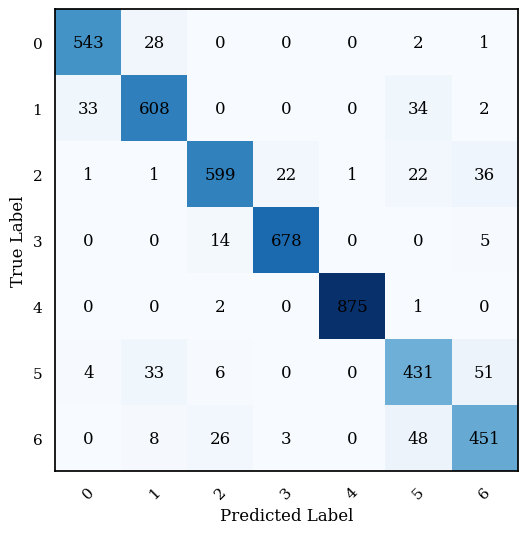

In [46]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier, plot_importance
plt.figure(figsize=(15, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.grid(False)
plt.show()

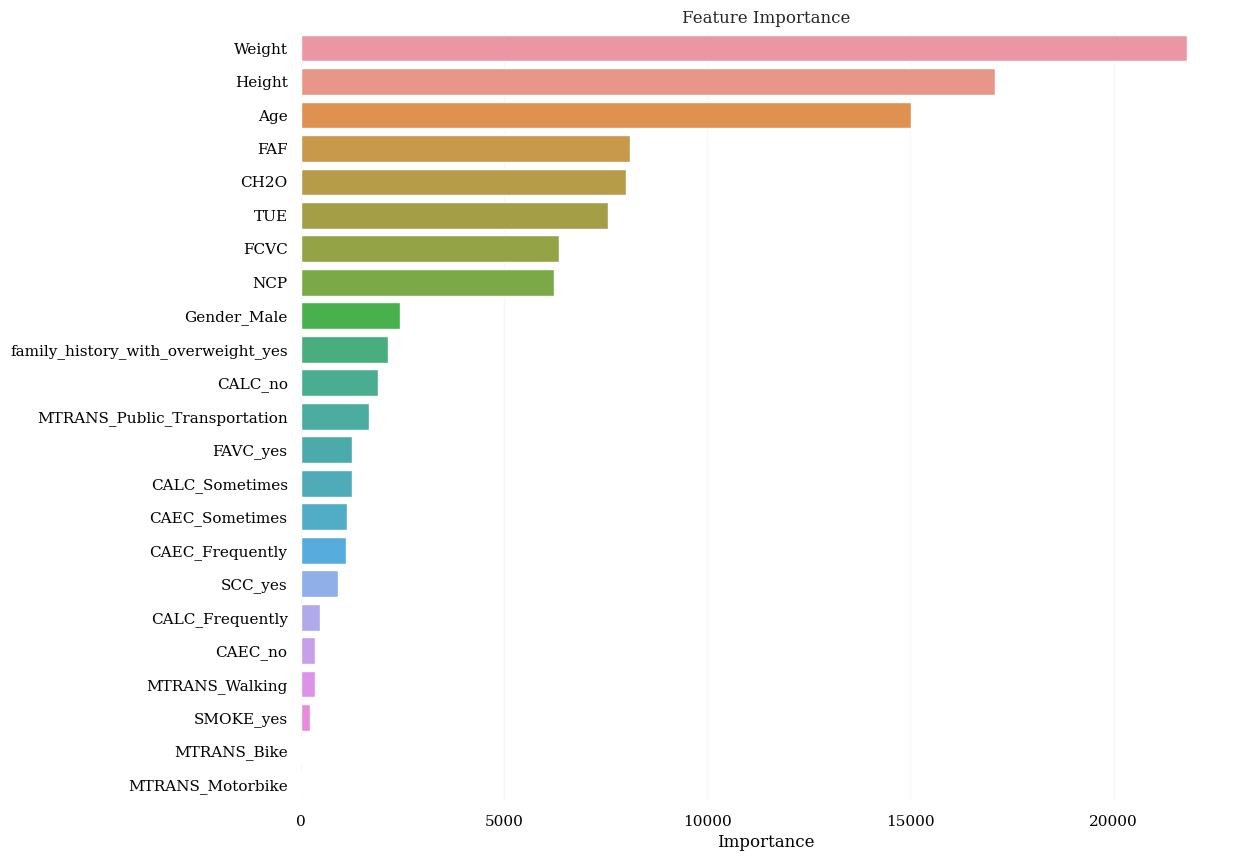

In [47]:
# feature importances
feature_importance = lgbm_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
⍟ Weight, Height, Age and FAF appear to be the most important features.<br>
⍟ CH20, Time using technology devices (TUE), and NCP are the other key important features.



    
    


<a id="toc"></a>

<a href="#toc" style="background-color: #E1B12D; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="5"></a>
## <b>5. <span style='color:#E1B12D'>Prediction on Test data</span></b> 


In [48]:
# Evaluate the best model on the test set
predictions = lgbm_classifier.predict(test)

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:150%; text-align:left">

Final Submission

In [49]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
submission["NObeyesdad"] = predictions
submission.to_csv("submission1.csv", index=False)
submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


<a id="toc"></a>

<a href="#toc" style="background-color: #E1B12D; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

---

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#E1B12D;">
    <em>Appreciate your time exploring my work. If you enjoyed it, kindly consider upvoting or feel free to drop comment / feedback to help enhance the notebook.<br>
Happy Learning!</em>
</p>

